# Collate Dataset

Each image has a name "Day_Temperature_Tank_CoralNumber.jpg"
Which maps to a row in the CSV

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import shutil

In [2]:
labelCSV = pd.read_csv("BleachingScoresJuly2018.csv")

In [3]:
labelCSV

,Tank_Number,Cycle_Number,Collected,Reef,Temperature,Ramp_Started_Day_1,Colony_Number,Day,Score,Scorer_1,Scorer_2,Scorer_3,Notes,Notes2
0,1,6,7/19/18,40,30.0,NaN,281,0,N,KCH,NSW,NaN,NaN,NaN
1,1,6,7/19/18,40,30.0,NaN,281,1,N,KCH,NSW,NaN,NaN,NaN
2,1,6,7/19/18,40,30.0,NaN,281,2,N,KCH,NSW,BHC,NaN,NaN
3,2,6,7/19/18,40,30.0,NaN,281,0,N,KCH,NSW,NaN,NaN,NaN
4,2,6,7/19/18,40,30.0,NaN,281,1,V,KCH,BHC,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5530,9,12,8/11/18,27,34.5,NaN,160,1,V,BHC,NaN,NaN,NaN,NaN
5531,9,12,8/11/18,27,34.5,NaN,160,2,V,BHC,NaN,NaN,NaN,NaN
5532,10,12,8/11/18,27,35.0,NaN,160,0,V,CAH,NSW,NaN,NaN,NaN
5533,10,12,8/11/18,27,35.0,NaN,160,1,S,BHC,NaN,NaN,NaN,NaN


In [4]:
def getLabel(filename):
    root = filename[:-4]
    day, temperature, tank, coralNum = root.split("_")
    day = int(day)
    temperature = float(temperature)
    tank = int(tank)
    coralNum = int(coralNum)
    
    temp = labelCSV[labelCSV.Day == (day - 1)]
    temp = temp[temp.Temperature == temperature]
    temp = temp[temp.Tank_Number == tank]
    temp = temp[temp.Colony_Number == coralNum]
        
    if temp.shape[0] > 1:
        raise "AHHHHHH more than one record for this image"
    
    return str(temp.iloc[0].Score)

In [5]:
s = "hello.jpg"
s[:-4]

'hello'

In [6]:
s = "1_34_8_378.jpg"
getLabel(s)

'V'

In [7]:
dataDir = "../Our data"

In [8]:
labels = []
for root, dirs, files in os.walk(dataDir):
    for name in files:
        
        filename = os.path.join(root, name)
        try:
            label = getLabel(name)
        except Exception as e:
            print(filename, e)
            continue
        print(filename, label)
        labels.append(label)

../Our data/Our data.zip not enough values to unpack (expected 4, got 1)
../Our data/Our data.7z not enough values to unpack (expected 4, got 1)
../Our data/0615_Tank1_30/1_30_1_003.JPG N
../Our data/0615_Tank1_30/1_30_1_009.JPG N
../Our data/0615_Tank1_30/1_30_1_013.JPG N
../Our data/0615_Tank1_30/1_30_1_004.JPG N
../Our data/0615_Tank1_30/1_30_1_008.JPG N
../Our data/0615_Tank1_30/1_30_1_014.JPG N
../Our data/0615_Tank1_30/1_30_1_007.JPG N
../Our data/0615_Tank1_30/1_30_1_005.JPG V
../Our data/0615_Tank1_30/1_30_1_010.JPG N
../Our data/0615_Tank1_30/1_30_1_001.JPG N
../Our data/0615_Tank1_30/1_30_1_012.JPG N
../Our data/0615_Tank1_30/1_30_1_015.JPG V
../Our data/0615_Tank1_30/1_30_1_006.JPG N
../Our data/0615_Tank1_30/1_30_1_002.JPG N
../Our data/0370_Tank3_34/1_34_3_353.JPG V
../Our data/0370_Tank3_34/1_34_3_375.JPG N
../Our data/0370_Tank3_34/1_34_3_381.JPG V
../Our data/0370_Tank3_34/1_34_3_395.JPG V
../Our data/0370_Tank3_34/.DS_Store not enough values to unpack (expected 4, got 

In [9]:
len(labels)

547

Counter({'N': 241, 'V': 195, 'M': 69, 'S': 20, 'T': 19, 'M/S': 1, 'V/T': 1, 'M/T': 1}) dict_keys(['V', 'M', 'M/S', 'V/T', 'N', 'S', 'M/T', 'T'])


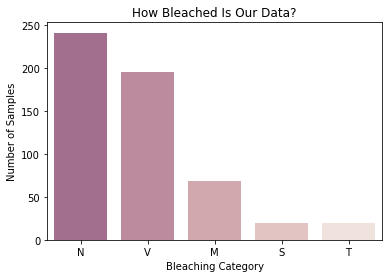

In [38]:
from collections import Counter
counts = Counter(labels)
print(counts, counts.keys())

import seaborn as sns
plt.figure()
plt.title("How Bleached Is Our Data?")
plt.ylabel('Number of Samples')
plt.xlabel('Bleaching Category')
x = np.array(list(counts.keys()))[[4, 0, 1, 5, 7]]
y = np.array(list(counts.values()))[[4, 0, 1, 5, 7]]
coral_colors = sns.cubehelix_palette(n_colors = 5, reverse = True, start=0, rot=0.4, gamma=1.0, hue=0.8, light=0.9, dark=0.5)
sns.barplot(x = x, y = y, palette = coral_colors)
plt.show()

In [17]:
a = list(counts.keys())
np.array(a)[[4, 0, 1, 5, 7]]

array(['N', 'V', 'M', 'S', 'T'], dtype='<U3')

In [20]:
#Split the dataset
valid_classes = ["V", "N", "M", "T", "S"]

if os.path.exists("../dataset"):
    shutil.rmtree("../dataset")
os.mkdir("../dataset")
os.mkdir("../dataset/train")
os.mkdir("../dataset/test")
for class_label in valid_classes:
    os.mkdir("../dataset/train/{}".format(class_label))
    os.mkdir("../dataset/test/{}".format(class_label))

numFiles = len(labels)
order = np.random.permutation(numFiles)
train_split = 0.8
print(order)
print("We have ", numFiles, " images, which will be split ", train_split, " into train.")

train_idxs = set(order[:int(train_split*numFiles)])

img_idx = 0
for root, dirs, files in os.walk(dataDir):
    for name in files:
        
        #Make sure file is valid
        filename = os.path.join(root, name)
        try:
            label = getLabel(name)
        except Exception as e:
            continue
            
        if label not in valid_classes:
            continue
            
        #Move it into train or test
        target_filename = "../dataset/{}/{}/".format("train" if img_idx in train_idxs else "test", label)
        print(target_filename)
        shutil.copy(filename, target_filename)
        
        img_idx += 1

[532  50 243 324 304 401 455 389  29 156  23 179  62 519 197 177 293 228
 318 478 408 306 526  15 525 488 433 279  83 143 199  28 492 115 340 399
 193 256 145 414 516 534 465 448 410 248 425 473  56 144 223 315 111 406
 184  18 321 329 255 402 421 247 221 253 128 445 476  70  30 366 334 387
 539 252 227 475 391 122 263 467 110 161 265  94 154 457 285 216 139 497
  59 411 289 108 345 541 384 264 107 297 430 232 363 342 152  91 434 118
 151  65 282 127 358 194 176  53 469 514 527  58 302 173   1 508 305 341
 374 328 234 464 385 449 129 505 165 515 524 378  52 456  21 436  39 485
 298 403  82 147 209 242 238 294  75 407  17 437 290 148 413 409 135 106
 153 215 533 268 489  64  60 262   5 537 418 174  36  11 300 208 543  85
 269 260 296 332 160 383 499 419 460 131 536 529 482 132  47 512  57  20
  72 428  31 502  41  98 487 388 490 246 546 200  12 222 443  46 432 542
 338 453  22 495 114 481 137 373 517 447 339 523 119 365 458 510 204 350
 169 360 149 484 333 386 291 381 323 105 369 404 50